In [4]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
import matplotlib.pyplot as plt

In [2]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


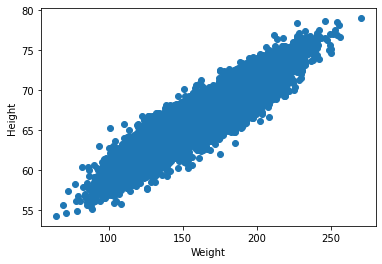

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [7]:
female = df['Gender'] == 'Female'
female_df = df[female]
female_df

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [8]:
male = df['Gender'] == 'Male'
male_df = df[male]
male_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


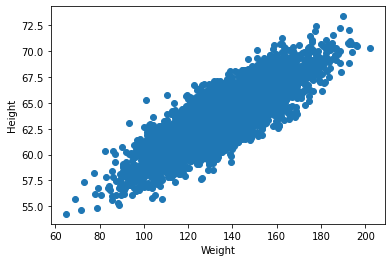

In [9]:
plt.scatter(female_df['Weight'],female_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

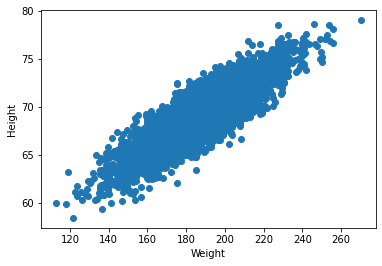

In [10]:
plt.scatter(male_df['Weight'],male_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

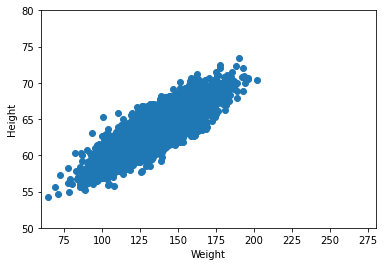

In [12]:
#Setting the axis limits so that both, males and females are on the same scale

plt.scatter(female_df['Weight'],female_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.xlim(60,280)
plt.ylim(50,80)
plt.show()

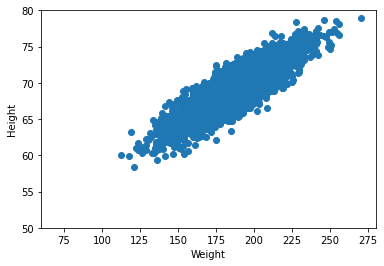

In [13]:
#Setting the axis limits so that both, males and females are on the same scale

plt.scatter(male_df['Weight'],male_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.xlim(60,280)
plt.ylim(50,80)
plt.show()

(50.0, 80.0)

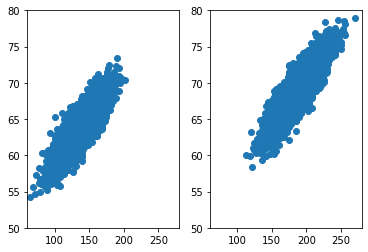

In [14]:
# Creating a subplot

plt.subplot(1,2, 1) #no. of rows and columns and the index
plt.scatter(female_df['Weight'],female_df['Height'])
plt.xlim(60,280)
plt.ylim(50,80)

plt.subplot(1,2, 2) #no. of rows and columns and the index
plt.scatter(male_df['Weight'],male_df['Height'])
plt.xlim(60,280)
plt.ylim(50,80)


In [15]:
# Getting the unique values

df.Gender.unique()

array(['Male', 'Female'], dtype=object)

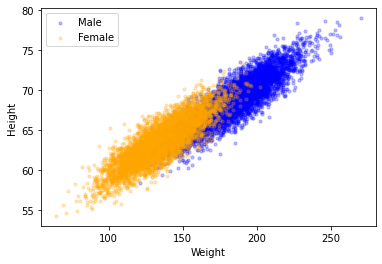

In [19]:
# plotting on the same plot
colour_dict = {'Female':'Orange' , 'Male':'Blue'}

for gender in df.Gender.unique():
    gendered_df = df[df['Gender'] == gender]
    plt.scatter(gendered_df['Weight'],gendered_df['Height'], 
                c=colour_dict[gender], label=gender,alpha=0.25, s=1)  #alpha is transperency and s sets the size
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()



In [20]:
# importing KMeans

from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(df.iloc[:,1:]) # all rows , all columns starting at 1


KMeans(n_clusters=4, random_state=0)

In [25]:
kmeans.labels_

array([2, 1, 2, ..., 0, 1, 0], dtype=int32)

In [26]:
kmeans.cluster_centers_

array([[ 61.60010293, 118.36613983],
       [ 67.92276487, 176.74238151],
       [ 71.308142  , 205.36804987],
       [ 64.76815395, 146.27185026]])

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.iloc[:,1:])
scaled_df = scaler.transform(df.iloc[:,1:])
scaled_df

array([[ 1.94406149,  2.50579697],
       [ 0.62753668,  0.02710064],
       [ 2.01244346,  1.59780623],
       ...,
       [-0.64968792, -1.02672965],
       [ 0.69312469,  0.07512745],
       [-1.14970831, -1.48850724]])

In [30]:
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [32]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[ 71.74084561, 205.19094461],
       [ 61.20132452, 118.94705354],
       [ 68.00486491, 177.60912558],
       [ 64.76879039, 145.92441733]])